# Dependencies

In [1]:
#pip install mlxtend

In [2]:
import pandas as pd
from mlxtend.frequent_patterns import association_rules, apriori

In [3]:
df = pd.read_csv("dataset/Groceries_dataset.csv")
df.shape

(38765, 3)

In [4]:
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


# Data Cleaning

Steps:

* Adjust data type;
* Rename column;

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'])

C:\Users\talit\AppData\Local\Temp\ipykernel_38596\2394721818.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date'] = pd.to_datetime(df['Date'])


In [7]:
df['Member_number'] = df['Member_number'].astype(str)

In [8]:
df.rename(columns={"Member_number":"customerId"}, inplace=True)

In [9]:
df.tail()

,customerId,Date,itemDescription
38760,4471,2014-08-10,sliced cheese
38761,2022,2014-02-23,candy
38762,1097,2014-04-16,cake bar
38763,1510,2014-03-12,fruit/vegetable juice
38764,1521,2014-12-26,cat food


# Exploratory Data Analysis

Steps:

* Detecting Weekday;
* Detecting Month of Year;

In [10]:
df['weekday'] = df['Date'].dt.weekday
df['weekday'] = df['weekday'].replace((0,1,2,3,4,5,6),("Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"))

In [11]:
df['month'] = df['Date'].dt.month
df['month'] = df['month'].replace((1,2,3,4,5,6,7,8,9,10,11,12),("Jan","Feb","Mar","Apr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dec"))

In [12]:
df['itemDescription'] = df['itemDescription'].str.strip()
df['itemDescription'] = df['itemDescription'].str.capitalize()
df

,customerId,Date,itemDescription,weekday,month
0,1808,2015-07-21,Tropical fruit,Tuesday,Jul
1,2552,2015-05-01,Whole milk,Friday,May
2,2300,2015-09-19,Pip fruit,Saturday,Sep
3,1187,2015-12-12,Other vegetables,Saturday,Dec
4,3037,2015-01-02,Whole milk,Friday,Jan
...,...,...,...,...,...
38760,4471,2014-08-10,Sliced cheese,Sunday,Ago
38761,2022,2014-02-23,Candy,Sunday,Feb
38762,1097,2014-04-16,Cake bar,Wednesday,Apr
38763,1510,2014-03-12,Fruit/vegetable juice,Wednesday,Mar


# Data Viz

* Top 10 best selling items
* Top 10 current recurring customers
* Days of the week with the most sales
* Month with the most sales

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

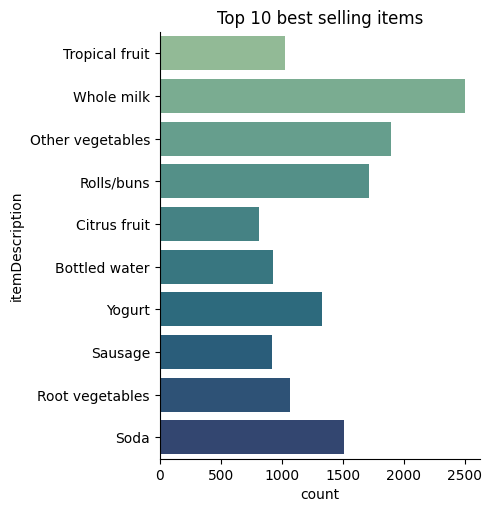

In [14]:
top_items = df["itemDescription"].value_counts().head(10)
top_items_df = df[df['itemDescription'].isin(top_items.index)]

sns.catplot(y="itemDescription", kind="count", palette="crest", data=top_items_df);
plt.title("Top 10 best selling items")
plt.show()

In [34]:
df["rank"] = df.groupby("customerId")["customerId"].rank(method="first", ascending=False)
df1 = df.sort_values(by=['Date','rank'], ascending=[False,False]).head(20).drop_duplicates(subset='customerId')
df1

,customerId,Date,itemDescription,weekday,month,rank
24650,2997,2015-12-30,Whole milk,Wednesday,Dec,15.0
32481,2810,2015-12-30,Whipped/sour cream,Wednesday,Dec,15.0
34960,3562,2015-12-30,Rolls/buns,Wednesday,Dec,15.0
32693,1527,2015-12-30,Bottled water,Wednesday,Dec,13.0
24374,3579,2015-12-30,Oil,Wednesday,Dec,11.0
16844,1509,2015-12-30,Liquor (appetizer),Wednesday,Dec,9.0
19393,2507,2015-12-30,Coffee,Wednesday,Dec,8.0
21796,3738,2015-12-30,Flour,Wednesday,Dec,8.0
22077,1491,2015-12-30,Pork,Wednesday,Dec,8.0
17347,3971,2015-12-30,Bottled beer,Wednesday,Dec,7.0


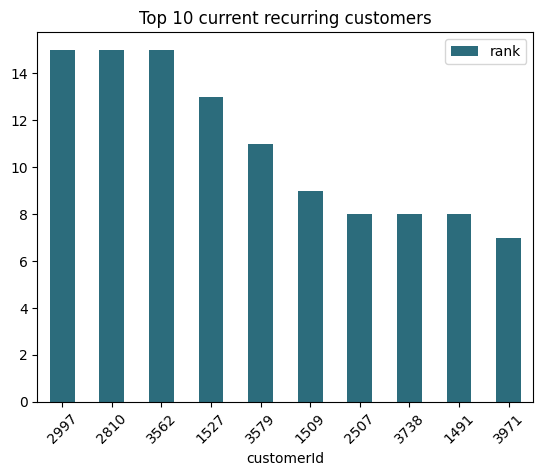

In [41]:
df1.plot.bar(x='customerId',y='rank',color="#2c6c7c");
plt.xticks(rotation=45)
plt.title("Top 10 current recurring customers")


plt.show()

In [ ]:
sns.catplot(y="customerId", kind="count", palette="crest", data=df1);
plt.title("Top 10 best selling items")

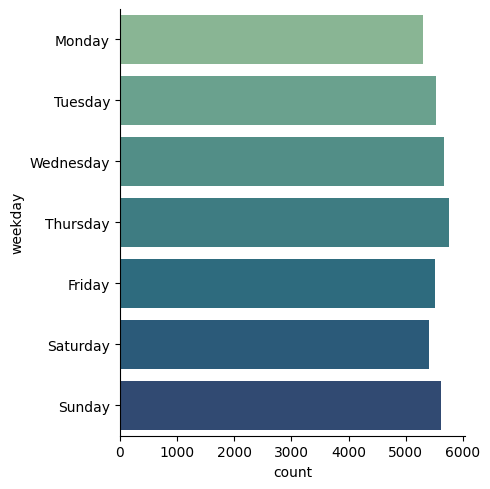

In [16]:
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.catplot(y="weekday", kind="count", palette="crest", data=df, order=order);
plt.show()

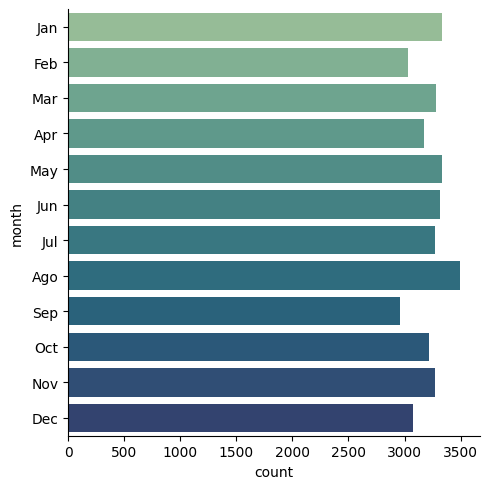

In [17]:
order1 = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Ago","Sep","Oct","Nov","Dec"]
sns.catplot(y="month", kind="count", palette="crest", data=df, order=order1);
plt.show()

# Data Preprocessing

Steps:

* Group by;
* Make a matrice;

In [18]:
transactions = df.groupby(["customerId","itemDescription"])["itemDescription"].count().reset_index(name='count')
transactions

,customerId,itemDescription,count
0,1000,Canned beer,1
1,1000,Hygiene articles,1
2,1000,Misc. beverages,1
3,1000,Pastry,1
4,1000,Pickled vegetables,1
...,...,...,...
34761,5000,Onions,1
34762,5000,Other vegetables,1
34763,5000,Root vegetables,1
34764,5000,Semi-finished bread,1


In [19]:
# making a mxn matrice where m=transaction and n=items and each row represents whether the item was in the transaction or not
basket = transactions.pivot_table(index='customerId',columns='itemDescription',values='count',aggfunc='size').fillna(0)
basket = basket.astype(int)
basket.head()

itemDescription,Abrasive cleaner,Artif. sweetener,Baby cosmetics,Bags,Baking powder,Bathroom cleaner,Beef,Berries,Beverages,Bottled beer,...,Uht-milk,Vinegar,Waffles,Whipped/sour cream,Whisky,White bread,White wine,Whole milk,Yogurt,Zwieback
customerId,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Model Building

* Use Apriori Algorithm with min_support representind 1% of transactions;
* Make the rules of association from frequent itens;

In [20]:
frequent_items = apriori(basket, min_support = 0.01,use_colnames = True)
frequent_items

C:\Users\talit\anaconda3\envs\lessons\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.031042,(Baking powder)
1,0.119548,(Beef)
2,0.079785,(Berries)
3,0.062083,(Beverages)
4,0.158799,(Bottled beer)
...,...,...
3011,0.011031,"(Soda, Yogurt, Whipped/sour cream, Whole milk)"
3012,0.010518,"(Rolls/buns, Yogurt, Bottled water, Whole milk..."
3013,0.013597,"(Rolls/buns, Sausage, Yogurt, Whole milk, Othe..."
3014,0.010005,"(Rolls/buns, Shopping bags, Yogurt, Whole milk..."


In [21]:
rules = association_rules(frequent_items, metric = "lift", min_threshold = 1)
rules.sort_values('confidence', ascending = False, inplace = True)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6936,"(Meat, Domestic eggs)",(Whole milk),0.013084,0.458184,0.010262,0.784314,1.711789,0.004267,2.512057,0.421328
5624,"(Fruit/vegetable juice, Chocolate)",(Whole milk),0.014366,0.458184,0.010775,0.750000,1.636898,0.004192,2.167265,0.394760
15141,"(Rolls/buns, Other vegetables, Yogurt, Bottled...",(Whole milk),0.014110,0.458184,0.010518,0.745455,1.626978,0.004053,2.128564,0.390879
11617,"(Pip fruit, Yogurt, Bottled water)",(Whole milk),0.013853,0.458184,0.010262,0.740741,1.616689,0.003914,2.089863,0.386811
11981,"(Rolls/buns, Brown bread, Yogurt)",(Whole milk),0.017445,0.458184,0.012827,0.735294,1.604802,0.004834,2.046862,0.383561
...,...,...,...,...,...,...,...,...,...,...
15228,(Whole milk),"(Rolls/buns, Shopping bags, Yogurt, Other vege...",0.458184,0.014110,0.010005,0.021837,1.547613,0.003540,1.007899,0.653069
10899,(Whole milk),"(Bottled beer, Soda, Bottled water)",0.458184,0.016932,0.010005,0.021837,1.289677,0.002247,1.005014,0.414554
9324,(Whole milk),"(Semi-finished bread, Other vegetables)",0.458184,0.017445,0.010005,0.021837,1.251746,0.002012,1.004490,0.371188
14483,(Whole milk),"(Root vegetables, Rolls/buns, Pip fruit)",0.458184,0.019497,0.010005,0.021837,1.119983,0.001072,1.002392,0.197722


In [22]:
# arranging the data from highest to lowest with respect to 'confidence'

rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6936,"(Meat, Domestic eggs)",(Whole milk),0.013084,0.458184,0.010262,0.784314,1.711789,0.004267,2.512057,0.421328
5624,"(Fruit/vegetable juice, Chocolate)",(Whole milk),0.014366,0.458184,0.010775,0.750000,1.636898,0.004192,2.167265,0.394760
15141,"(Rolls/buns, Other vegetables, Yogurt, Bottled...",(Whole milk),0.014110,0.458184,0.010518,0.745455,1.626978,0.004053,2.128564,0.390879
11617,"(Pip fruit, Yogurt, Bottled water)",(Whole milk),0.013853,0.458184,0.010262,0.740741,1.616689,0.003914,2.089863,0.386811
11981,"(Rolls/buns, Brown bread, Yogurt)",(Whole milk),0.017445,0.458184,0.012827,0.735294,1.604802,0.004834,2.046862,0.383561
...,...,...,...,...,...,...,...,...,...,...
11277,(Whole milk),"(Rolls/buns, Frankfurter, Bottled water)",0.458184,0.014879,0.010005,0.021837,1.467564,0.003188,1.007112,0.588020
11599,(Whole milk),"(Yogurt, Pastry, Bottled water)",0.458184,0.015136,0.010005,0.021837,1.442690,0.003070,1.006850,0.566336
7961,(Whole milk),"(Pastry, Ham)",0.458184,0.014366,0.010005,0.021837,1.519977,0.003423,1.007637,0.631386
1067,(Whole milk),(Dish cleaner),0.458184,0.018728,0.010005,0.021837,1.166010,0.001424,1.003178,0.262772
